In [ ]:
import pandas as pd

# **Steps:**
1. Dataset extraction from kaggle
2. EDA 
3. Data cleaning(droping null values, removing Unwanted columns)
4. Data Wrangling
  * Detecting the language
  * Splitting the columns
  * Categorizing the columns
5. Plotting the data







In [ ]:
af_url = 'https://drive.google.com/file/d/1o5-xulwFzvw0dXaxrgjIPjaaQ6OjfVH3/view?usp=share_link'
ca_url = 'https://drive.google.com/file/d/1TkTmOTvF5vq4wKqmy0785M-3Bqn5yMd4/view?usp=share_link'
us_url = 'https://drive.google.com/file/d/1qzQcDmD5Pw9BhNa06qVKm4ReSus9rhge/view?usp=share_link'
af_df = pd.read_csv('https://drive.google.com/uc?id=' + af_url.split('/')[-2],error_bad_lines=False)
ca_df = pd.read_csv('https://drive.google.com/uc?id=' + ca_url.split('/')[-2],error_bad_lines=False)
us_df = pd.read_csv('https://drive.google.com/uc?id=' + us_url.split('/')[-2],error_bad_lines=False)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
af_df.head(3)

In [ ]:
ca_df.head()

In [ ]:
us_df.head()

In [ ]:
#Africa df has 9 columns and 5744 with null values
#Canada df has 9 columns and 2773 with null values
#USA df has 9 columns and 2845 with null values
us_df.shape

(2845, 9)

In [ ]:
#checking for null values in data frame columns
af_df.isnull().values.any() # dataframe has null values
us_df.isnull().values.any() # dataframe has null values
ca_df.isnull().values.any() # dataframe has null values
list(us_df.columns)

In [ ]:
# Africa dataset info
af_df.info()
af_df.isnull().sum()

In [ ]:
# Canada dataset info
ca_df.info()
ca_df.isnull().sum()

In [ ]:
# USA dataset info
us_df.info()
us_df.isnull().sum()

In [ ]:
#concating all the datasets to one df
df = pd.concat([af_df, ca_df, us_df])
df.shape

(8490, 9)

In [ ]:
df.head(5)

In [ ]:
#dropping link and description column
df = df.drop(['description', 'link'], axis=1)
df.shape

(8490, 7)

In [ ]:
#Criteria column in datafram has rows with other language
df['criteria']

In [ ]:
!pip install langdetect
import io, re, ast
from langdetect import detect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=8ff47a03fbf10f8ca6892b7d6a69cfda30b523af77560325d1482cd7d30d372f
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [ ]:
#Detecting language code of each row in the criteria column
#Assigning language code of each row to new column lang_code
lang_code = []
for row in df['criteria']:
    txt = re.sub(r'[{}\[\]:\'\'"",]', '', row) if row else ''
    lang = detect(txt) if txt else None
    lang_code.append(lang)
df = df.assign(lang_code=lang_code)

In [ ]:
# 360 ar language codes are detected and 129 null values
pd.unique(df['lang_code']) #unique values ['ar', 'en', None]
null_values = df['lang_code'].isna().sum()
ar_values = df[df['lang_code'] == 'ar']
print('Null Values:',null_values, '\nar code values:',len(ar_values))

Null Values: 129 
ar code values: 360


In [ ]:
#dropping rows from dataframe which are not 'en' 
df = df[df['lang_code']=='en']
df.shape # dataframe with rows 8001 and columns 8

(8001, 10)

In [ ]:
#Criteria column has string list, converting them to list
df['criteria'] = df['criteria'].apply(lambda x: list(ast.literal_eval(x)))

In [ ]:
#Extracting SeniorityLevel and EmploymentType from Criteria column
seniority_level, employment_type = [], []
for employment_category in df['criteria']:
  seniority, employment = None, None
  for employment_types in employment_category:
    seniority = employment_types.get('Seniority level')
    if seniority:
      break
  seniority_level.append(employment_types.get('Seniority level'))
  for employment_types in employment_category:    
    employment = employment_types.get('Employment type')
    if employment:
      break
  employment_type.append(employment_types.get('Employment type'))
df = df.assign(seniority_level=seniority_level, employment_type=employment_type)
df.head()

In [ ]:
df.head()

In [ ]:
#Unique categories and Null values in each new column
sn_unq, sn_val = len(pd.unique(df['seniority_level'])), df['seniority_level'].isna().sum() # 7 unique categories and 369 null values
et_unq, et_val = len(pd.unique(df['employment_type'])), df['employment_type'].isna().sum() # 7 unique categories
print(sn_unq, sn_val)
print(et_unq, et_val)
pd.unique(df['seniority_level'])

7 369
7 0


array(['Associate', 'Not Applicable', 'Mid-Senior level', 'Entry level',
       'Internship', None, 'Executive'], dtype=object)

In [ ]:
#Filtering rows with null values and Not Applicable in Seniority Level
pd.unique(df['seniority_level']) 
#These are the unique values['Associate', 'Not Applicable', 'Mid-Senior level', 'Entry level', 'Internship', None, 'Executive']
df = df.loc[(df['seniority_level'].notnull()) & (df['seniority_level'] != 'Not Applicable')] 
df.shape# 6450 rows and 10 columns

(6450, 12)

In [ ]:
df.columns

In [ ]:
#dropping columns criteria, lang_code, industry, job function
df = df.drop(['criteria', 'lang_code'], axis=1)
df.shape                                            # 6450 rows and 8 columns

(6450, 10)

In [ ]:
# Finding unique values in the title column of data frame
unique_title = pd.unique(df['title'])
len_title = len(unique_title)                
print(unique_title)#54 unique values
# print("No.of.unique values :", unique_title+"\n", "ALL values : ", len_title)

In [ ]:
# Manually categorizing title's to 5 categorize [data_analyst, marketing_analyst, data_engineer, business_analyst, fin_hr_hlth_analyst]
data_analyst = ['Data Analyst','Data Analyst (Remote)', 'Data Entry Analyst (Risk)', 'Data Analyst/Developer', 'Junior Data Analyst - Mississauga, ON','Data Analyst, Operations',
 'Senior Data Analyst', 'Data Entry/ JR Analyst -6 Month Contract', 'Quality Data Analyst', 'Data Governance Analyst', 'Data Analyst/Oracle', 'Analyste de donnÃ©es', 'Data Analyst (contract)','Sr. Data Analyst', 'Data Specialist',
 'Online Data Analyst', 'Job Opportunity: Data Stage Developer || Remote', 'Data Analysts', 'Data Visualization Developer/Analyst', 'Product Data Analyst', 'Cognitive Data Analyst', 'Data Analyst (Operations)', 'Data Analyst - Marketing',
 'Senior Data Analyst, APAC Marketplace', 'Senior Data Analyst - Remote', 'Insights Analyst', 'Data Analyst, Trilogy (Remote) - $60,000/year USD', 'Product Data Analyst - WTFast', 'Senior Data Analyst (Toronto, ON)',
 'Senior Data Analyst, Analytics & Insights (Toronto, ON)', 'Data Research Analyst, Trilogy (Remote) - $60,000/year USD', 'Gaming Data Analyst', 'Senior Data and Reporting Analyst', 'Data Analyst / Consultant (Fire / EMS)',
 'Cybersecurity Data Analyst', 'Data Analyst/Forecasting Specialist', 'Data Science Analyst (Remote)', 'Senior Data Analyst (Vancouver, BC)','Google Cloud Platform Analytics Engineer', 'Cloud Data Analyst',
 'Google Analytics Engineer', 'Principal Data Analyst', 'Data Analyst (C117)', 'Business Data Analyst', 'Data Analyst (12 Month Contract)', 'Data Analyst (Hybrid)', 'Data Analyst (Python/SQL)', 'Data Analyst - Reporting',
 'Data Analyst, Flight Pricing Optimization', 'Sector Data Analyst, Data Driven Investing', 'Data Administrator/Data Analyst', 'Commercial Data Analyst','Senior Data Analyst (PowerBI)','Analyst, Data Science- EN', 'Data Science Analyst',
 'Analyst, Data Operations', 'Information Analyst', 'Graduate Geospatial Analyst (Available 2023)','Data Analytics','Data Analyst 2','Researcher', 'Information Governance Analyst', 'Digital Analyst', 'Operational Data Analyst',
 'Campaign/Data Analyst',  'Analyst, Data Science- FR', 'Data Analyst - Land', 'Senior Data Governance Analyst', 'Senior Analyst, Cyber Governance (Data Analytics)', 'SEO Data Analyst', 'Data Analyst - Recent Graduate',
 'Entry-Level Data Analyst', 'Analyst (Global Data and Analytics)', 'Data Analytics Analyst', 'Data Analyst, Money', 'Data Analyst/Collector', 'Data Analyst I', 'Entry Level Data Analyst', 'Data Analyst I (entry level)', 'Analyst - Data Visualization','Data Analyst - (Remote - US)','Analyst, Data and Analytics','SQL Data Analyst','Data Visualization Analyst','Data Analyst - remote!','REMOTE Data Analyst (SQL, Operations)','Data Analyst - Remote',
 'Data Analyst (SQL)','Data Analyst (Global Remote)','Junior Data Analyst-Entry Level','WFH//Data Analyst','Data Analyst III - Remote','Data Analyst (SQL, Teraform, Tableau) III - Remote',
 'Junior Data Analyst','Associate Data Analyst','Data Analyst/ $100M Valuation/ Hybrid','Data Analyst - Weekly Hybrid Remote/Onsite Schedule','Group Data Analyst','Consultant/Data Analyst',
 'Data Analyst - Energy','Hubspot Data Analyst','Data Analyst - Junior','Data Analyst Graduate','Data analyst / SQL Developer','Junior Data Engineer','Supply Chain Data MGT Analyst, AMET (Short-term)',
 'Data Analyst At IITA (Tamale)','Data Analyst JHB','Market Data Analyst','Regional Data Analyst','People Data Analyst at SA Taxi Development Finance','Data Analyst at Datonomy Solutions',
 'Specialist: Data Analytics','Data Analyst (JHB)','Data Analyst H.F','Analytics Specialist','Insight Analyst / Data Analyst','Data Quality Analyst','BI Specialist At Vodafone Ghana',
 'Analyst, Data Science','Junior / Graduate Data Engineer','Data Analyst, Forward Kitchens (Remote) - $60,000/year USD','Clinical Data Analyst (FSP), South Africa','Python Data Analyst (Remote)','People Data Analyst',
 'Reference Data Analyst','IDM Data Analyst','Remote Data Analyst/Engineer Jobs', 'Remote Data Analyst Jobs', 'International consultant - Data analysis and Monitoring, Mogadishu, Somalia, 6 months [home based]','Data Customer Analyst','Reporting and Data Analyst',
 'Forensics Data Analyst','Data Intelligence Analyst','Data Analyst (Power BI & Python/R)','Data Analyst (H/F)','Data Analysis and Data Expert','Web Data Analyst','Data Entry and Research Analyst']                             
marketing_analyst = ['Sr. Market Data Analyst', 'Market Conduct Data Analyst - 4 month Co-Op', 'HR Data Analyst', 'Data Analyst â€“ Loans/Capital Markets','Marketing Data Analyst']
data_engineer = ['ETL and Data Quality Analyst', 'Data Engineer (Remote)', 'Data Engineer (Contract)', 'Data Engineer (REMOTE)', 'Junior Data Engineer', 'Junior / Graduate Data Engineer', 
                 'Data Engineer at Youverify', 'Data Quality Analyst', 'Data Entry and Research Analyst']               
business_analyst = ['ANALYSTE BI', 'Business Intelligence Analyst', 'BI Reporting Analyst', 'Senior BI Analyst','Senior Analytics Engineer (Remote)', 'BI/Analytics Consultant', 'PowerBI Specialist',
 'Business Data Analyst, Finance', 'Business Intelligence Analyst (FP&A)','Business Data Analyst','CV Data Engineer - CDA', 'BI Analyst', 'Business Intelligence Consultant', 
 'BI Data Analyst (Contract)', 'Global Business Data Analyst', 'BI Researcher','Insights Analyst','BI Data Analyst']
fin_hr_hlth_analyst = ['Data Analyst - Loans', 'Quantitative Data Intern', 'IT Data Analyst - SQL, Banking Finance', 'Future Opportunities: Data Analyst & Report Specialist (Remote)',
 'Data Analyst (Credit Risk)', 'Data Analyst (Fraud Division)', 'Merchandise Data Analyst (Fashion Retail)','Finance Data Analyst', 'HR Data Analyst']

In [ ]:
# Assigning the formatted titles to new column formatted_title
formatted_title = []
for job_title in df['title']:
  if job_title in data_analyst:                   #Data Analyst
    formatted_title.append("Data Analyst")
  elif job_title in marketing_analyst:            #Marketing Analyst
    formatted_title.append("Marketing Analyst")
  elif job_title in data_engineer:                #Data Engineer
    formatted_title.append("Data Engineer")
  elif job_title in business_analyst:             #Business Analyst
    formatted_title.append("Business Analyst")
  elif job_title in fin_hr_hlth_analyst:          #Finance/Health/Hr Analyst
    formatted_title.append("Fin Hlth HR Analyst")
  else:                                           #Data Analyst
    formatted_title.append("Data Analyst") 
df = df.assign(formatted_title=formatted_title)
# df = df.drop(['title'], axis=1)                        #dropping the title column
df.shape                                               # 2288 rows and 7 column

(6450, 11)

In [ ]:
#Type casting the salary column
df['salary'] = df['salary'].str.replace('$', '').str.replace(',', '').str.replace('.', '').str.replace("'", '').str.replace('\D', '')
#Replace null value with 0
df['salary'] = df['salary'].fillna(0)
# Convert "salary" column to integer
df['salary'] = df['salary'].astype(int)

<ipython-input-58-ab642667c755>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salary'] = df['salary'].str.replace('$', '').str.replace(',', '').str.replace('.', '').str.replace("'", '').str.replace('\D', '')
<ipython-input-58-ab642667c755>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['salary'] = df['salary'].str.replace('$', '').str.replace(',', '').str.replace('.', '').str.replace("'", '').str.replace('\D', '')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

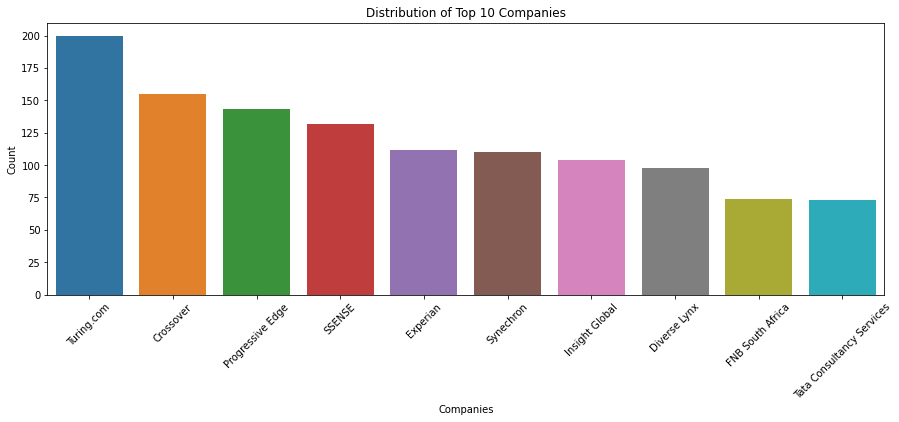

In [ ]:
#Top 10 companies Distribution
top_10_companies = df['company'].value_counts().nlargest(10).sort_values(ascending=False).index.tolist()
df_top_10 = df[df['company'].isin(top_10_companies)]
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.countplot(data=df_top_10, x='company', order=top_10_companies)
plt.title('Distribution of Top 1 Companies')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

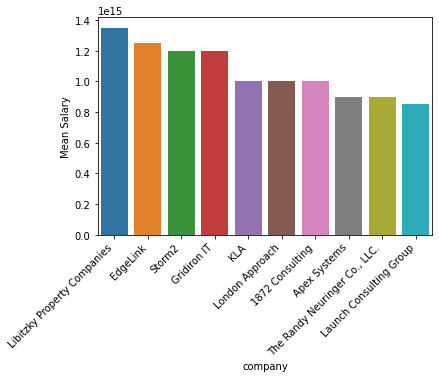

In [ ]:
#Top 10 High paying companies
#rows with salary
df_with_salary = df[df['salary']!=0]
mean_salary_by_company = df_with_salary.groupby('company')['salary'].mean().sort_values(ascending=False)
top_salary_by_company = mean_salary_by_company.nlargest(10)
sns.barplot(x=top_salary_by_company.index, y=top_salary_by_company.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Salary')
plt.show()

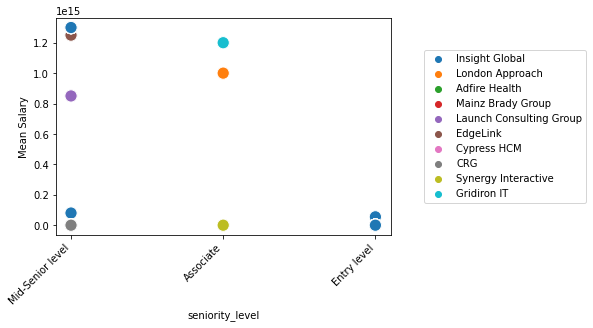

In [ ]:
#Scatter plot for top 10 Companies Correlation with SeniorityLevel and Salary
df_with_salary = df[df['salary']!=0]
top_10_companies = df_with_salary['company'].value_counts().nlargest(10).sort_values(ascending=False).index.tolist()
df_top_10 = df[df['company'].isin(top_10_companies)]
ax = sns.scatterplot(data=df_top_10, x='seniority_level', y='salary', hue='company', s=150)
ax.legend(loc='right', bbox_to_anchor=(1.6, 0.5))
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Salary')
plt.show()

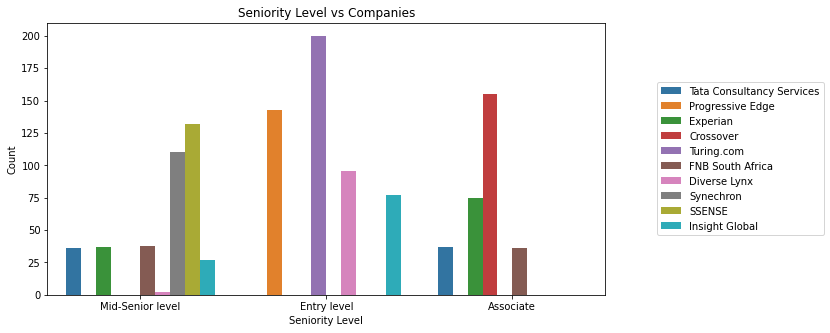

In [ ]:
#Top 10 companies with SeniorityLevel 
top_10_companies = df['company'].value_counts().sort_values(ascending=False)[:10].index.tolist()
df_top_10_companies = df[df['company'].isin(top_10_companies)]
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_top_10_companies, x='seniority_level', hue='company')
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.title('Seniority Level vs Companies')
plt.xlabel('Seniority Level')
plt.ylabel('Count')
plt.show()

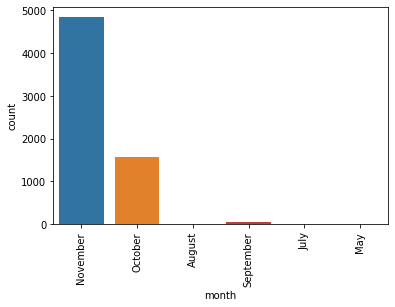

In [ ]:
# Job posting months
df['posted_date'] = pd.to_datetime(df['posted_date'])
# # Create a new column for the month
df['month'] = df['posted_date'].dt.month_name()
# mon = df['posted_date'].dt.month_name()
# pd.unique(df['posted_date'].dt.month_name())
# Create a countplot of job postings by month
sns.countplot(x='month', data=df)
plt.xticks(rotation=90)
plt.show()

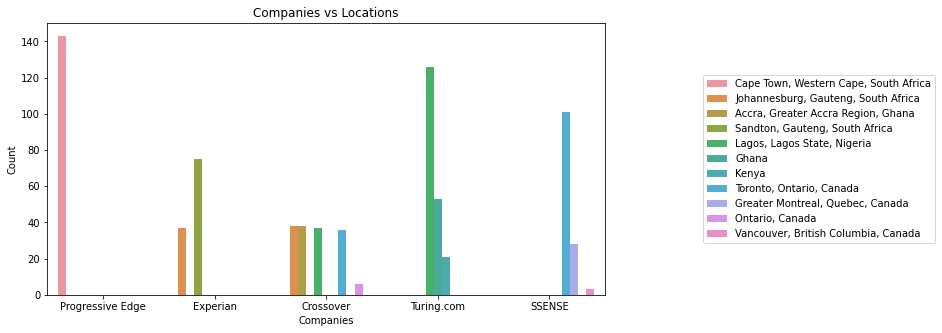

In [ ]:
# Companies vs Locations
top_10_locations = df['company'].value_counts().sort_values(ascending=False)[:5].index.tolist()
df_top_10_locations = df[df['company'].isin(top_10_locations)]
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_top_10_locations, x='company', hue='location')
ax.legend(loc='right', bbox_to_anchor=(1.6, 0.5))
plt.title('Companies vs Locations')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()